In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.ion()
import time

In [2]:
networks = { 'Dense': 'dense',
             'Conv1': 'conv1',
             'Conv2': 'conv2',
             'Inception': 'inception',
             'ResNet': 'resnet'}

startPath = '/s/red/b/nobackup/data/bsattelb/linearRegions/'
endPath = 'MNIST{}Region{}.npy'

for key in networks:
    networks[key] = startPath + networks[key] + endPath
keyLabels = list(networks.keys())

In [3]:
trainInputs = np.load('MNISTTestInputs.npy')
trainInputs = np.hstack((trainInputs, np.ones((trainInputs.shape[0], 1))))

trainLabels = np.load('MNISTTestLabels.npy')

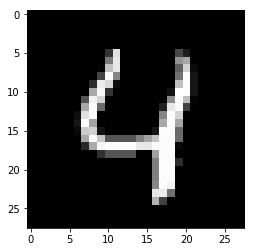

In [4]:
plt.imshow(trainInputs[4, :-1].reshape(28, 28), cmap='gray')
plt.imsave('regions/true.png', trainInputs[4, :-1].reshape(28, 28), cmap='gray', dpi=280)#, vmin=0, vmax=255)

/s/parsons/h/proj/vision/usr/bsattelb/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


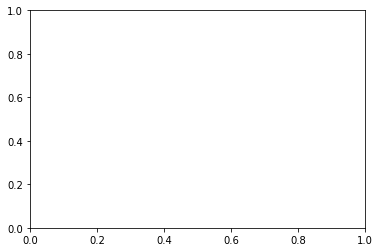

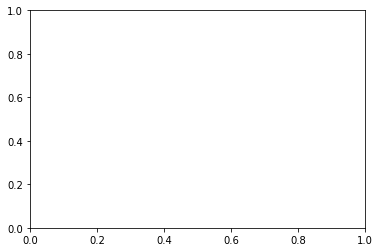

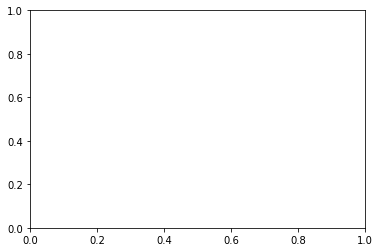

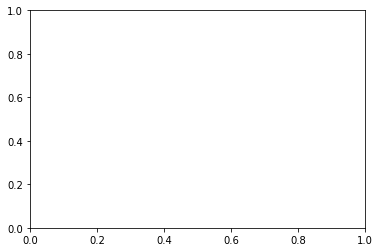

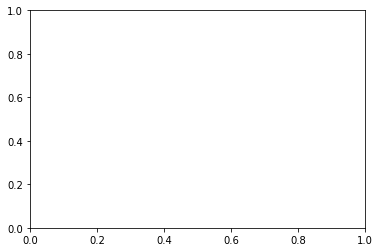

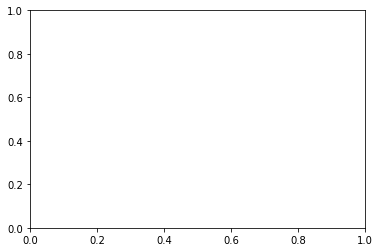

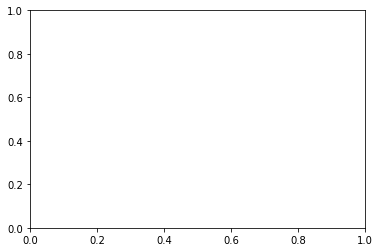

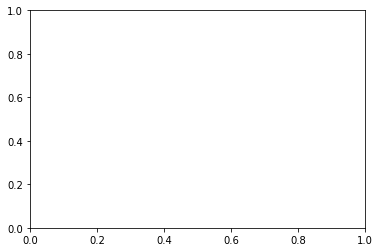

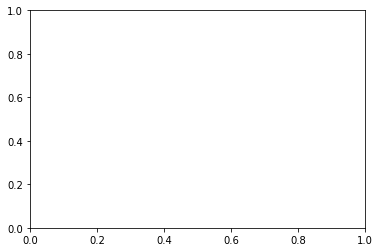

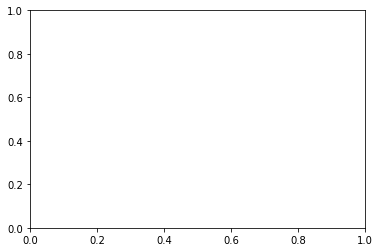

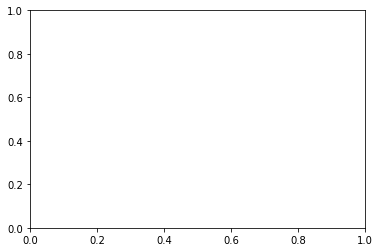

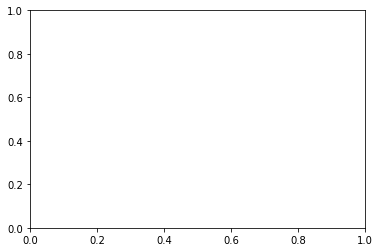

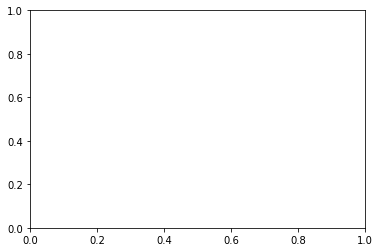

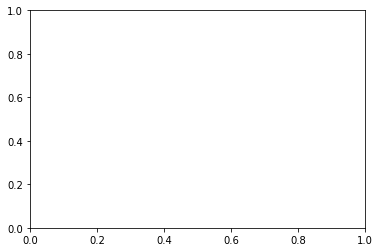

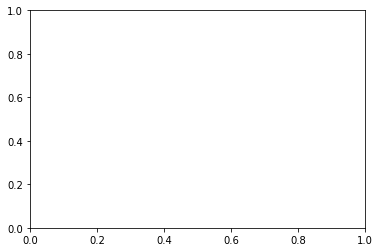

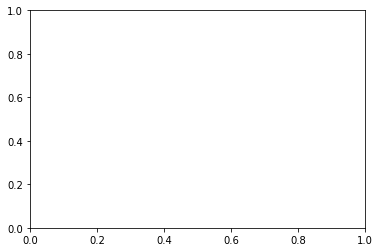

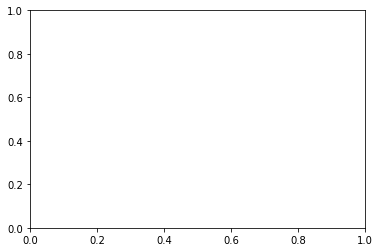

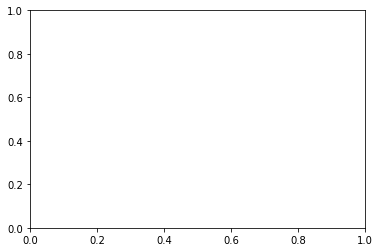

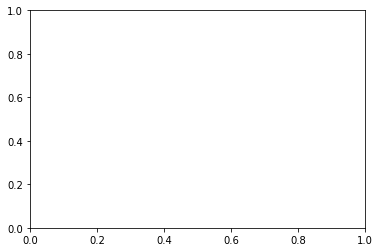

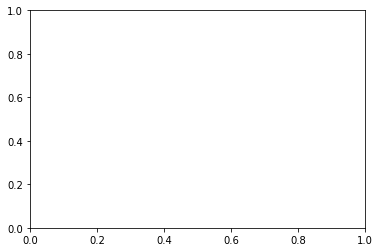

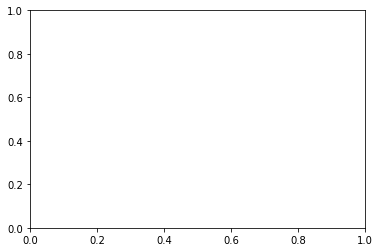

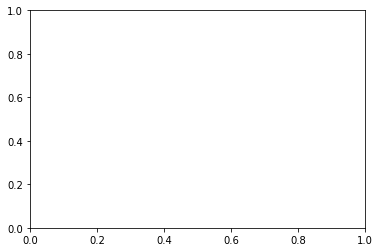

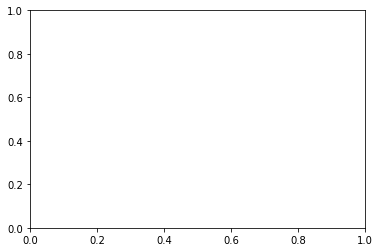

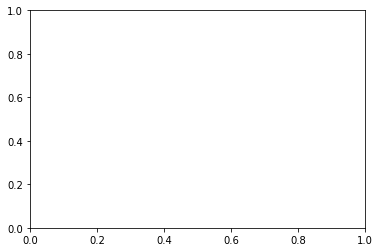

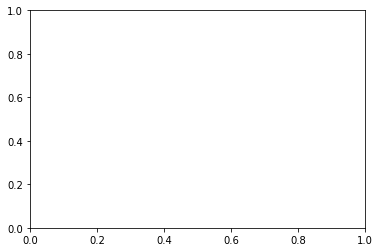

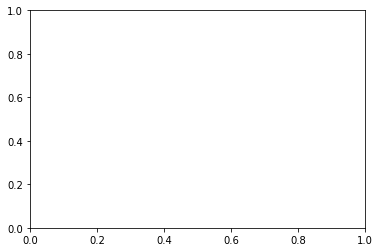

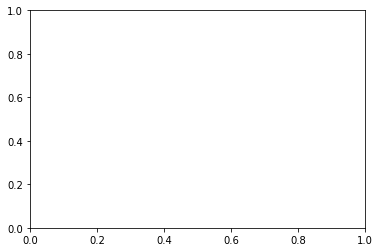

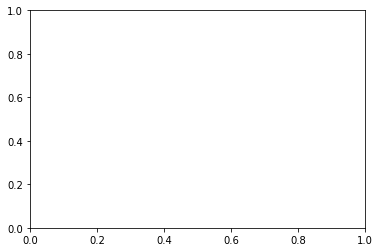

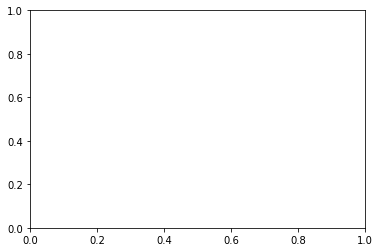

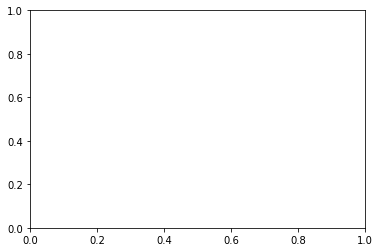

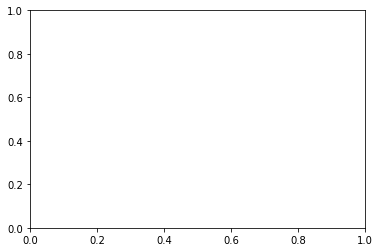

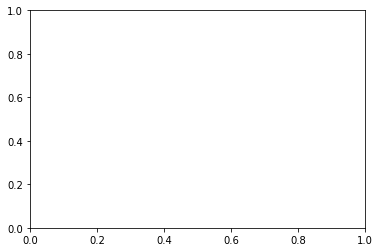

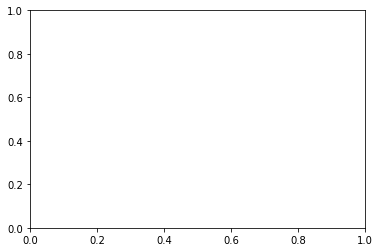

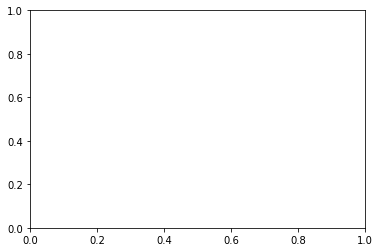

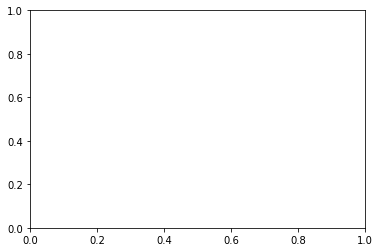

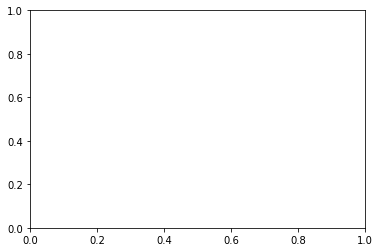

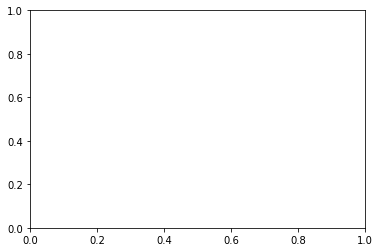

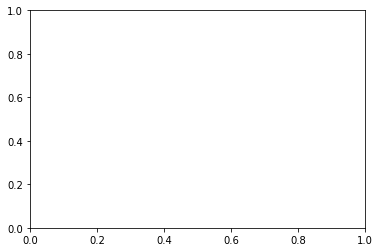

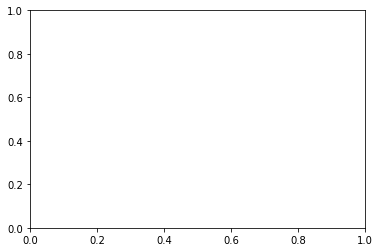

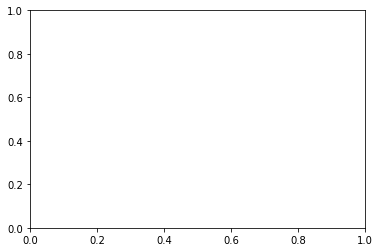

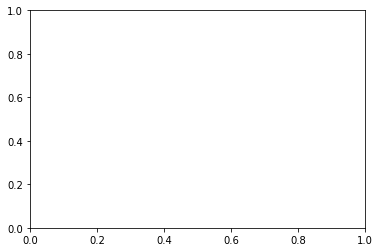

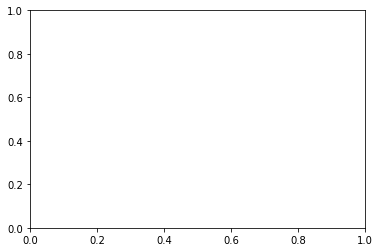

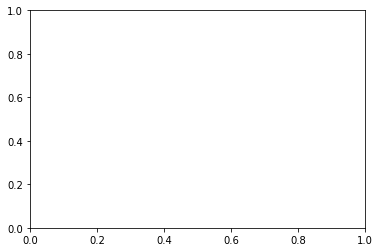

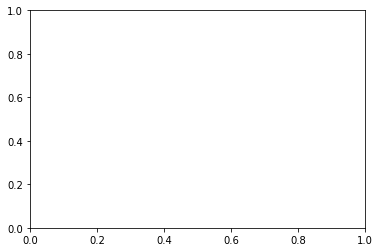

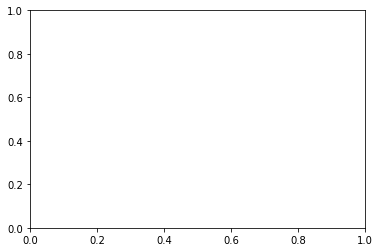

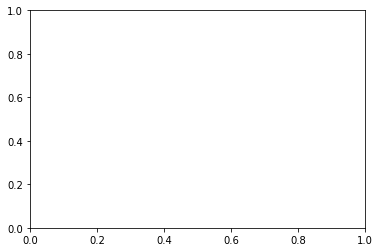

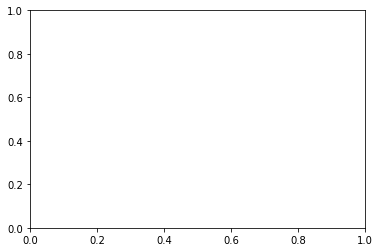

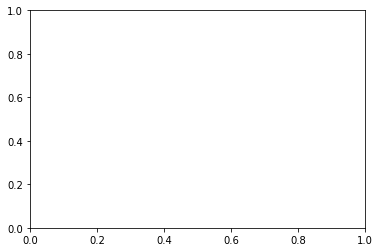

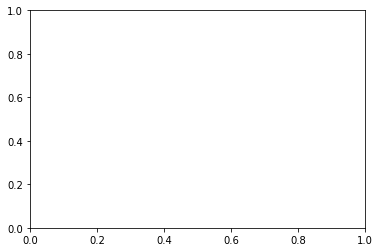

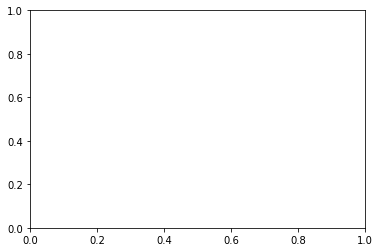

In [5]:
for key in keyLabels:
    for i in range(10):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        regions = np.load(networks[key].format('Test', i))
        maxVal = np.max(np.abs(regions[4, :-1]))
        plt.imsave('regions/{}Region{}.png'.format(key, i), regions[4, :-1].reshape(28, 28), cmap='gray', dpi=280, vmin=-maxVal, vmax=maxVal)#, vmin=0, vmax=255)